# Importing all required libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Importing the dataset

In [72]:
dos = pd.read_csv("DoS_dataset.csv")

In [73]:
dos.head()

,1478198376.389427,0316,8,05,21,68,09,21.1,21.2,00,6f,R
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


# Specifying column names

In [74]:
dos.columns = ["Timestamp", "Message Identifier", "Data Length", "Data[0]", "Data[1]", "Data[2]", "Data[3]", "Data[4]", "Data[5]", "Data[6]", "Data[7]", "Target"]

In [75]:
dos.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],Target
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


# Checking presence of NULL or NA values

In [76]:
dos.isnull().sum()

Timestamp                 0
Message Identifier        0
Data Length               0
Data[0]                   0
Data[1]                   0
Data[2]                   0
Data[3]               31188
Data[4]               31188
Data[5]               31188
Data[6]               31188
Data[7]               31188
Target                31188
dtype: int64

In [77]:
dos.isna().sum()

Timestamp                 0
Message Identifier        0
Data Length               0
Data[0]                   0
Data[1]                   0
Data[2]                   0
Data[3]               31188
Data[4]               31188
Data[5]               31188
Data[6]               31188
Data[7]               31188
Target                31188
dtype: int64

# Finding unique entries in Message Identifier

In [78]:
dos["Message Identifier"].unique()

array(['018f', '0260', '02a0', '0329', '0545', '0002', '0153', '02c0',
       '0130', '0131', '0140', '0350', '043f', '0370', '0440', '0316',
       '04f0', '0430', '04b1', '01f1', '05f0', '00a0', '00a1', '0690',
       '05a0', '05a2', '0000'], dtype=object)

In [79]:
dos["Message Identifier"].nunique(dropna = True)

27

In [80]:
dos["Target"].unique()

array(['R', nan, 'T'], dtype=object)

In [81]:
dos = dos.dropna(subset="Target")

In [82]:
dos["Target"].unique()

array(['R', 'T'], dtype=object)

# Creating Time Difference column

In [83]:
# Finding time difference between all consecutive entries belonging to same message identifier and storing it in TimeDiff column
dos["TimeDiff"] = dos.groupby("Message Identifier")["Timestamp"].diff()

In [84]:
dos.head(30)

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],Target,TimeDiff
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R,NaN
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R,NaN
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R,NaN
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R,NaN
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R,NaN
5,1.478198e+09,0002,8,00,00,00,00,00,03,0b,11,R,NaN
6,1.478198e+09,0153,8,00,21,10,ff,00,ff,00,00,R,NaN
7,1.478198e+09,02c0,8,14,00,00,00,00,00,00,00,R,NaN
8,1.478198e+09,0130,8,08,80,00,ff,31,80,0b,7f,R,NaN
9,1.478198e+09,0131,8,e5,7f,00,00,48,7f,0b,ac,R,NaN


In [85]:
dos = dos.dropna(subset=["TimeDiff"])

In [86]:
dos.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],Target,TimeDiff
16,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R,0.010170
17,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,07,R,0.010172
18,1.478198e+09,02a0,8,04,00,9a,1d,97,02,bd,00,R,0.010176
19,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R,0.010179
21,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R,0.010423


# Visualising density of TimeDiff values using histogram

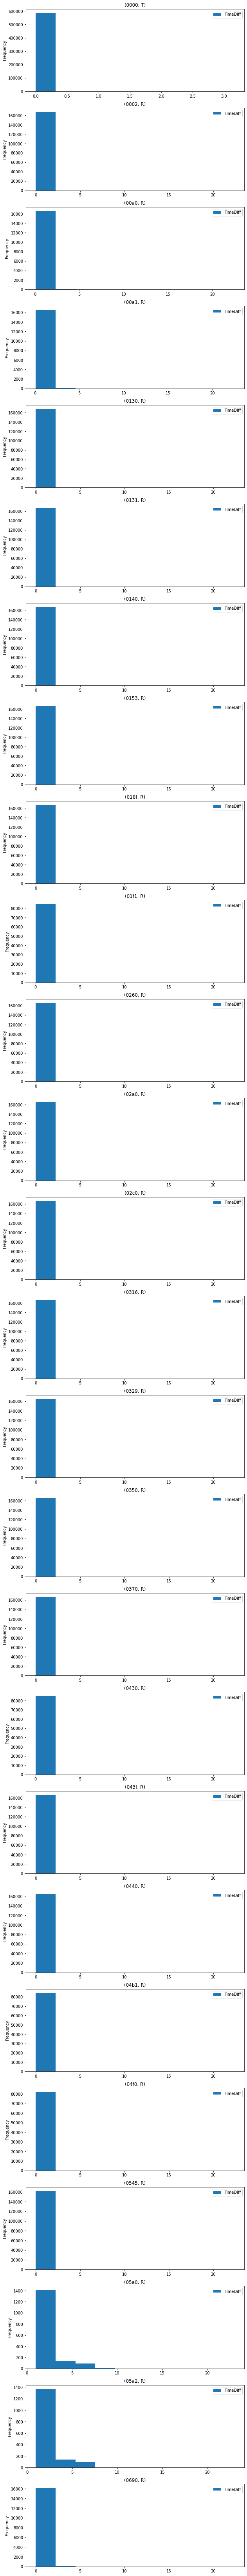

In [87]:
ax = dos.plot.hist(column = ["TimeDiff"], by=["Message Identifier", "Target"], figsize = (10,120))

# Creating X and y (X-independent variables, y- dependent target value)

In [88]:
X = dos.drop("Target", axis = 1)

In [89]:
X.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],TimeDiff
16,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,0.010170
17,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,07,0.010172
18,1.478198e+09,02a0,8,04,00,9a,1d,97,02,bd,00,0.010176
19,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,0.010179
21,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,0.010423


In [90]:
y = dos["Target"]

In [91]:
y

16         R
17         R
18         R
19         R
21         R
          ..
3665765    R
3665766    R
3665767    R
3665768    R
3665769    R
Name: Target, Length: 3634556, dtype: object

# Encoding Complete Data

In [92]:
# Since KNN cant work well with non numeric data. Hence it becomes necessary to encode the data into numeric values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [93]:
X["Message Identifier"] = le.fit_transform(X["Message Identifier"])

In [94]:
X.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],TimeDiff
16,1.478198e+09,8,8,fe,5b,00,00,00,3c,00,00,0.010170
17,1.478198e+09,10,8,19,21,22,30,08,8e,6d,07,0.010172
18,1.478198e+09,11,8,04,00,9a,1d,97,02,bd,00,0.010176
19,1.478198e+09,14,8,40,bb,7f,14,11,20,00,14,0.010179
21,1.478198e+09,22,8,d8,00,00,8a,00,00,00,00,0.010423


In [95]:
X["Data[0]"] = le.fit_transform(X["Data[0]"])
X["Data[1]"] = le.fit_transform(X["Data[1]"])
X["Data[2]"] = le.fit_transform(X["Data[2]"])
X["Data[3]"] = le.fit_transform(X["Data[3]"])
X["Data[4]"] = le.fit_transform(X["Data[4]"])
X["Data[5]"] = le.fit_transform(X["Data[5]"])
X["Data[6]"] = le.fit_transform(X["Data[6]"])
X["Data[7]"] = le.fit_transform(X["Data[7]"])


In [96]:
# Data completely Encoded into numeric values
X.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],TimeDiff
16,1.478198e+09,8,8,106,28,0,0,0,60,0,0,0.010170
17,1.478198e+09,10,8,25,2,11,7,8,142,46,7,0.010172
18,1.478198e+09,11,8,4,0,47,5,131,2,73,0,0.010176
19,1.478198e+09,14,8,51,65,39,4,17,32,0,20,0.010179
21,1.478198e+09,22,8,92,0,0,22,0,0,0,0,0.010423


# Splitting the dataset into train and test sections

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the data for easy computations

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Importing and applying KNN classifier on data

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
# Training the model using train section of the dataset
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [110]:
# Testing the model on the test section
y_pred = classifier.predict(X_test)

In [111]:
# Calculating confusion matrix and accuracy values
from sklearn.metrics import confusion_matrix, accuracy_score
confMat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

<AxesSubplot:>

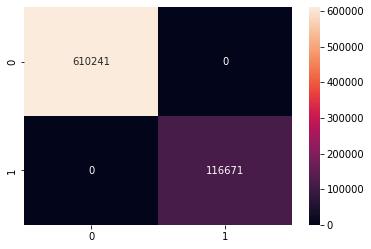

In [112]:
# Confusion matrix is the best measure tounderstand the true positive and false positive detections of our model.
confMat
sns.heatmap(confMat, annot=True, linecolor="yellow", fmt="d")

In [117]:
# Getting accuracy
accuracy

1.0